# Simple Exploratory Data Analysis

Data used here is from [this Kaggle page](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019) which has been released by SDSN and extracted by PromptCloud's custom web crawling solution.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pd.read_csv('data/world-happiness-report-2019.csv')

## Overview of Data

Each column of data has the next description.

1. <b>Country (region)</b> Name of the country.
2. <b>Ladder</b> is a measure of life satisfaction.
3. <b>SD of Ladder</b> Standard deviation of the ladder.
4. <b>Positive affect</b> Measure of positive emotion.
5. <b>Negative affect</b> Measure of negative emotion.
6. <b>Social support</b> The extent to which Social support contributed to the calculation of the Happiness Score.
7. <b>Freedom</b> The extent to which Freedom contributed to the calculation of the Happiness Score.
8. <b>Corruption</b> The extent to which Perception of Corruption contributes to Happiness Score.
9. <b>Generosity</b> The extent to which Generosity contributed to the calculation of the Happiness Score.
10. <b>Log of GDP per capita</b> The extent to which GDP contributes to the calculation of the Happiness Score.
11. <b>Healthy life expectancy</b> The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Data is sorted in a way the country on top of the dataframe is the happiest while the last is the opposite.

In [44]:
data.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


## Cleaning

Ladder is just another word for ranking so I removed it together with SD of ladder and renamed others. 

In [45]:
data = data.drop(['Ladder', 'SD of Ladder'], axis=1)

data = data.rename(columns={
    'Country (region)':'Country',
    'Positive affect':'Pos',
    'Negative affect':'Neg',
    'Log of GDP\nper capita':'GDP',
    'Healthy life\nexpectancy':'Life expectancy'
})

In [46]:
data.shape

(156, 9)

Let's see how many rows are null.

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Country            156 non-null object
Pos                155 non-null float64
Neg                155 non-null float64
Social support     155 non-null float64
Freedom            155 non-null float64
Corruption         148 non-null float64
Generosity         155 non-null float64
GDP                152 non-null float64
Life expectancy    150 non-null float64
dtypes: float64(8), object(1)
memory usage: 11.0+ KB


In [48]:
data.isnull().sum()

Country            0
Pos                1
Neg                1
Social support     1
Freedom            1
Corruption         8
Generosity         1
GDP                4
Life expectancy    6
dtype: int64

There are a few ways when dealing with null samples. 
1. Drop Rows
2. Fill with mean values or similar computation (e.g. forward fill)
3. Use K-Nearest Neighbors

Because the whole data is small anyway, I chose to just drop them.

In [49]:
data = data[~data.isnull().any(axis=1)]
data.shape

(140, 9)

## Exploration

Next we see the general numeric description of each feature.

In [50]:
data.describe()

,Pos,Neg,Social support,Freedom,Corruption,Generosity,GDP,Life expectancy
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,78.242857,79.157143,77.500000,78.828571,75.700000,78.850000,79.014286,75.478571
std,44.331627,44.506126,45.815787,45.108972,42.656011,44.727782,43.356310,43.979961
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,40.750000,40.750000,36.750000,39.750000,39.750000,40.750000,41.750000,36.750000
50%,78.500000,78.500000,77.500000,79.500000,76.500000,79.500000,78.500000,77.500000
75%,116.250000,117.250000,118.250000,118.250000,112.250000,116.250000,117.250000,113.250000
max,154.000000,154.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


The data looks quite weird because we can see that all features' descriptions are almost the same. Additionally, the max value of Life expectancy is 150!

One of many things to do at the beginning of EDA is checking if any outliers exist among samples.

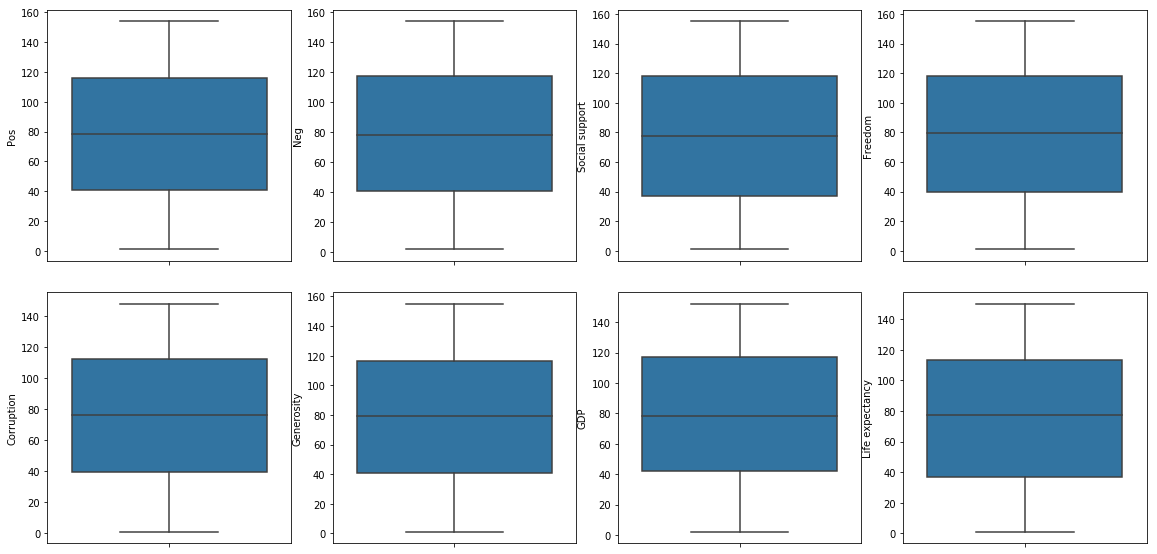

In [51]:
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
plt.tight_layout()

for i, feature in enumerate(list(data)[1:]):
    sns.boxplot(x=feature, data=data, orient='v', ax=ax[int(i-4>=0)][i%4]);

It does not seem like there exists any outliers so we don't have to drop any samples.

After cleaning up the data a bit, we could try if any of features are correlated.

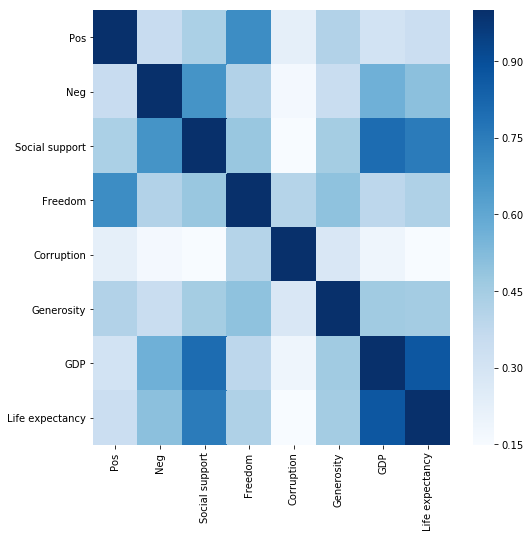

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), cmap="Blues");

In [12]:
data.corr()

,Pos,Neg,Social support,Freedom,Corruption,Generosity,GDP,Life expectancy
Pos,1.000000,0.351906,0.433333,0.696567,0.225905,0.417061,0.310843,0.339032
Neg,0.351906,1.000000,0.671387,0.415935,0.166472,0.350541,0.565756,0.507148
Social support,0.433333,0.671387,1.000000,0.478613,0.148890,0.448135,0.801898,0.755292
Freedom,0.696567,0.415935,0.478613,1.000000,0.407571,0.498226,0.385919,0.423949
Corruption,0.225905,0.166472,0.148890,0.407571,1.000000,0.281146,0.186140,0.148973
Generosity,0.417061,0.350541,0.448135,0.498226,0.281146,1.000000,0.459762,0.453135
GDP,0.310843,0.565756,0.801898,0.385919,0.186140,0.459762,1.000000,0.873628
Life expectancy,0.339032,0.507148,0.755292,0.423949,0.148973,0.453135,0.873628,1.000000


It seems GDP and Life expectancy are the most correlated with the value of 0.847850, among others.

I though for a while what I could do with the data above. What I did was to evenly distribute samples and add a new feature <b>Class</b> which each sample will have either 0, 1, or 2.

<b>0</b> shows a country is <b>happy</b>, <b>1</b> is <b>neutral</b> and <b>2</b> is <b>sad</b> (or unhappy). The smaller the value, the happier. This way, I can see which other features are correlated to it.

In [13]:
size = int(data.shape[0]/3)
size

46

In [14]:
data['Class'] = 0
data.iloc[size:2*size]['Class'] = 1
data.iloc[2*size:]['Class'] = 2

/home/han/anaconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/han/anaconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# Happiest countries among each group

data.iloc[[0, size, 2*size], :]

,Country,Pos,Neg,Social support,Freedom,Corruption,Generosity,GDP,Life expectancy,Class
0,Finland,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,0
53,South Korea,101.0,45.0,91.0,144.0,100.0,40.0,27.0,9.0,1
104,Laos,5.0,112.0,120.0,22.0,27.0,34.0,102.0,112.0,2


After adding the feature, I found a few things I could try and the first thing I did was to see how much Freedome behaves when classifying the Class.

In [16]:
def distplot(col, bins=10):
    
    fig, ax = plt.subplots(1,3,figsize=(16, 4))

    sns.distplot(data[data['Class']==0][col], bins=10, ax=ax[0])
    ax[0].set_title('Class 0')

    sns.distplot(data[data['Class']==1][col], bins=10, ax=ax[1])
    ax[1].set_title('Class 1')

    sns.distplot(data[data['Class']==2][col], bins=10, ax=ax[2])
    ax[2].set_title('Class 2')

    plt.show();

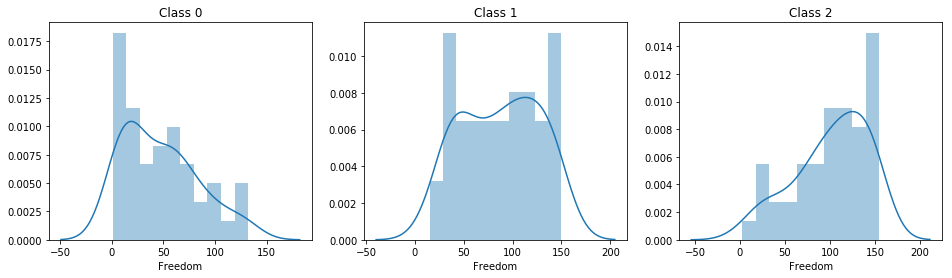

In [17]:
distplot('Freedom')

It seems that the lower the freedom value is, the happier a country is. What?

I'm not sure how the data is computed exactly because when I checked out the original data from the original site, the features were different so I think this data was aggregated in some way I have no idea.

But EDA continues.

Let's do the same with Corruption.

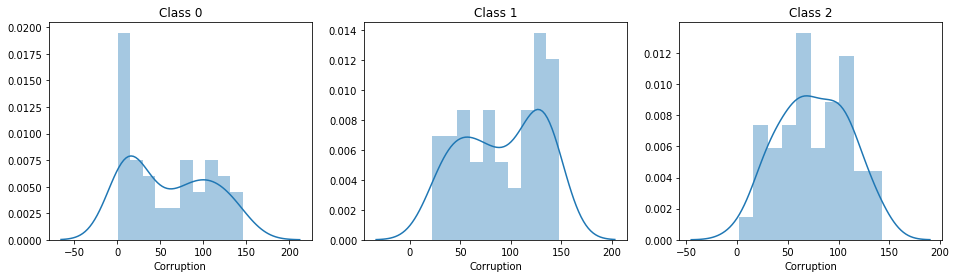

In [18]:
distplot('Corruption')

Based on the plot, Corruption affects less to the happiness of a country than the Freedom because the line plots are less indicative that Class 1 and Class 2 looks quite similar.

I chose three features <b>Social support</b>, <b>GDP</b>, and <b>Life expectancy</b> that are highly correlated to <b>Class</b> from the heatmap plot for better information gain.

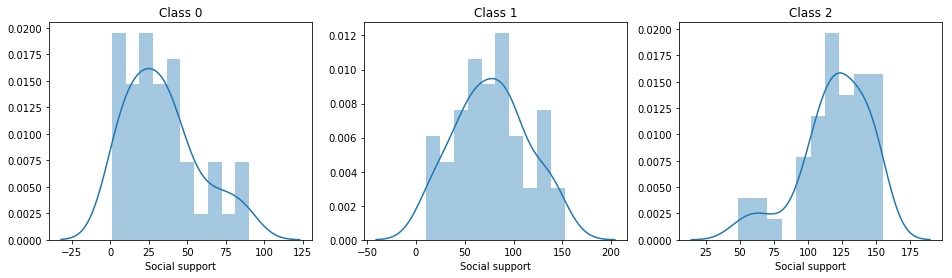

In [19]:
distplot('Social support')

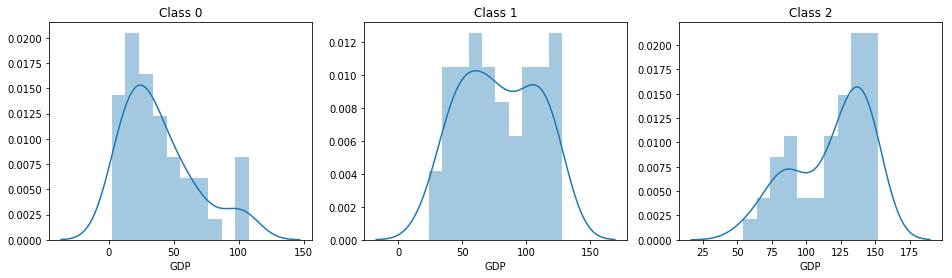

In [20]:
distplot('GDP')

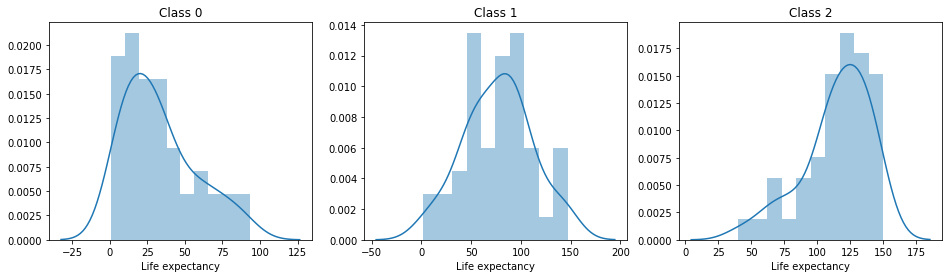

In [21]:
distplot('Life expectancy')

All of the above plots show one common thing. The countires with Class 0 have right-skewed distribution while Class 2 have left-skewed distribution. And of course, Class 1 countries show more symmetric distribution than others.

Now that we've found out they are correlated to Class, we explore if they are correlated themselves.

In [22]:
def scatterplot(x, y):
    
    fig, ax = plt.subplots(1, 3, figsize=(16, 6))

    sns.regplot(x, y, data=data[data['Class']==0], ax=ax[0])
    ax[0].set_title('Class 0', size=15)
    ax[0].set_xlabel(x, size=15)
    ax[0].set_ylabel(y, size=15)
    
    sns.regplot(x, y, data=data[data['Class']==1], ax=ax[1])
    ax[1].set_title('Class 1')
    ax[1].set_title('Class 1', size=15)
    ax[1].set_xlabel(x, size=15)
    ax[1].set_ylabel(y, size=15)
    
    sns.regplot(x, y, data=data[data['Class']==2], ax=ax[2])
    ax[2].set_title('Class 2')
    ax[2].set_title('Class 2', size=15)
    ax[2].set_xlabel(x, size=15)
    ax[2].set_ylabel(y, size=15)
    
    plt.show();

In [23]:
x = 'Social support'
y = 'GDP'
z = 'Life expectancy'

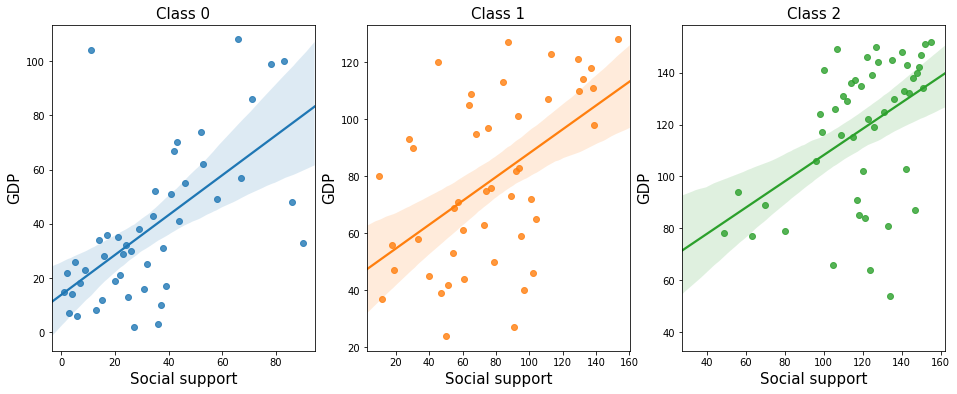

In [24]:
scatterplot(x, y)

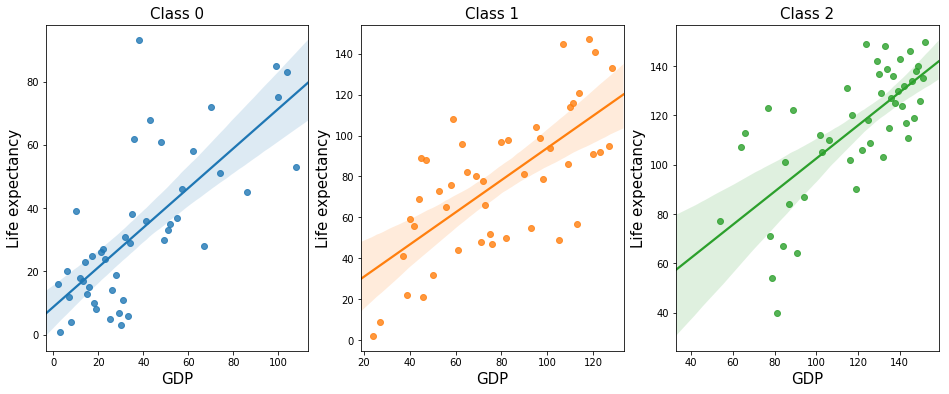

In [25]:
scatterplot(y, z)

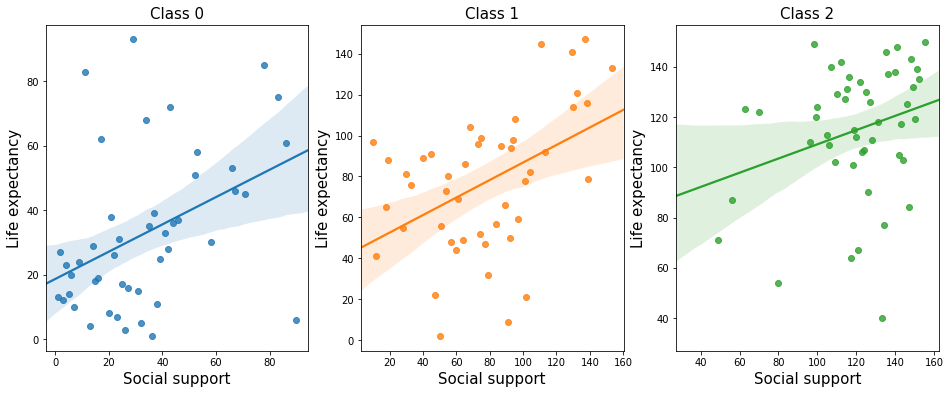

In [26]:
scatterplot(x, z)

We can do the same thing as above but this time, using all Class.

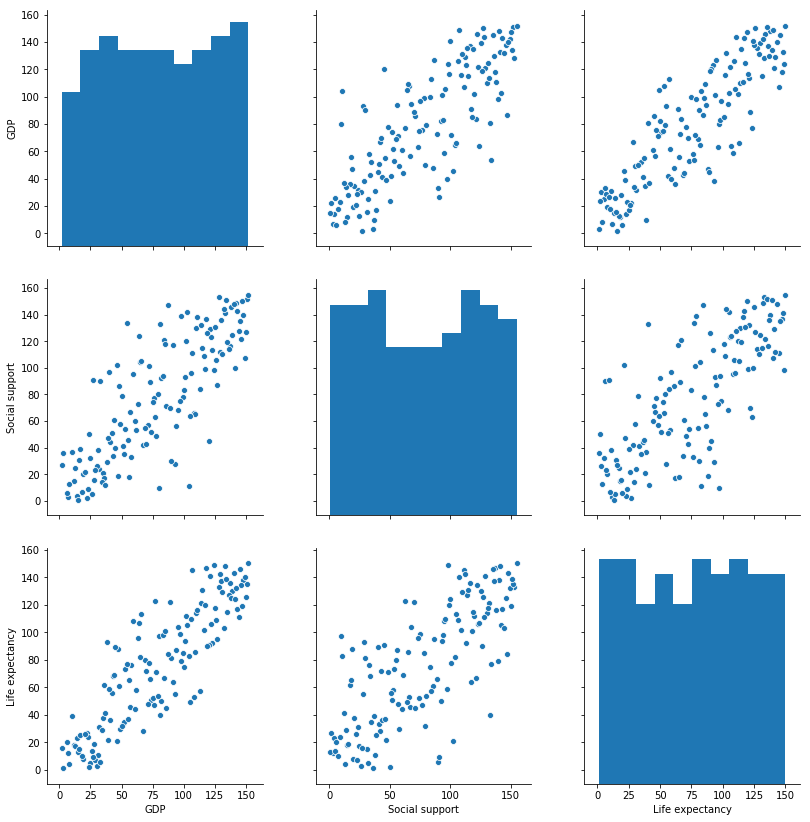

In [27]:
fig = sns.pairplot(data=data[['GDP', 'Social support', 'Life expectancy']])

fig.fig.set_size_inches(12, 12);

---

# Classification

Since we've added Class feature, we could build a model which predicts based on other features.

In [28]:
from sklearn.tree import DecisionTreeClassifier

We only have 140 samples so it may not work very well. So I held out 5 samples from each class for validation set.

In [29]:
# Reset index since some samples were dropped before that a few numbers skip
data.index = np.arange(data.shape[0])

In [30]:
# Randomly choose testing samples
happy_idx = np.random.choice(np.arange(size), size=5, replace=False)
neutral_idx = np.random.choice(np.arange(size, 2*size), size=5, replace=False)
sad_idx = np.random.choice(np.arange(2*size, data.shape[0]), size=5, replace=False)

test_idx = list(happy_idx) + list(neutral_idx) + list(sad_idx)

In [31]:
test = data.iloc[test_idx]
test

,Country,Pos,Neg,Social support,Freedom,Corruption,Generosity,GDP,Life expectancy,Class
9,Austria,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0,0
44,Thailand,20.0,35.0,53.0,18.0,131.0,10.0,62.0,58.0,0
11,Costa Rica,4.0,87.0,42.0,16.0,58.0,75.0,67.0,28.0,0
30,El Salvador,23.0,84.0,83.0,74.0,85.0,134.0,100.0,75.0,0
14,United Kingdom,52.0,42.0,9.0,63.0,15.0,4.0,23.0,24.0,0
80,Lebanon,150.0,61.0,89.0,136.0,133.0,63.0,73.0,66.0,1
89,Benin,118.0,148.0,153.0,103.0,75.0,116.0,128.0,133.0,1
76,Kyrgyzstan,58.0,4.0,45.0,38.0,138.0,36.0,120.0,91.0,1
75,Nigeria,61.0,55.0,111.0,75.0,114.0,59.0,107.0,145.0,1
54,Hungary,86.0,31.0,51.0,138.0,140.0,100.0,42.0,56.0,1


In [32]:
train = data[~data.index.isin(test_idx)]

train.shape, test.shape

((125, 10), (15, 10))

In [33]:
def split_data(dat):
    
    X = dat.loc[:, ['Social support', 'GDP', 'Life expectancy']]
    y = dat.loc[:, 'Class']
    
    return X, y

In [34]:
# Only use three features
X_train, y_train = split_data(train)
X_test, y_test = split_data(test)

In [35]:
# Set random_state for reproducibility
clf = DecisionTreeClassifier(random_state=123)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6

Using the top 3 correlated features show poor result so I used all features again.

In [36]:
X_train, y_train = train.drop(['Class', 'Country'], axis=1), train.loc[:, 'Class']
X_test, y_test = test.drop(['Class', 'Country'], axis=1), test.loc[:, 'Class']

In [37]:
clf2 = DecisionTreeClassifier(random_state=123)

clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.7333333333333333

It still works poorly but the score increased a little.

If we sort the features by descending order based on its importance to Class, we have the following result.

In [38]:
feature_importances = np.stack((clf2.feature_importances_, list(X_train)), axis=1)
feature_importances = feature_importances[feature_importances.argsort(axis=0)[:, 0]][::-1]
feature_importances

array([['0.4142949321885567', 'Social support'],
       ['0.21236655751701508', 'Life expectancy'],
       ['0.19426150211454782', 'Pos'],
       ['0.07316573199725', 'GDP'],
       ['0.06856838306865988', 'Freedom'],
       ['0.021338796065126005', 'Neg'],
       ['0.016004097048844503', 'Generosity'],
       ['0.0', 'Corruption']], dtype='<U32')

In many cases, 8 features for a machine learning model aren't considered too much dimension and not really necessary to reduce them. However, let's see how many we can eliminate and still maintain the score.

In [39]:
scores = []

for i in range(1, len(feature_importances)+1):
    
    features = feature_importances[:i, 1]

    clf = DecisionTreeClassifier(random_state=123)
    
    clf.fit(X_train.loc[:, features], y_train)
    
    scores.append(clf.score(X_test.loc[:, features], y_test))

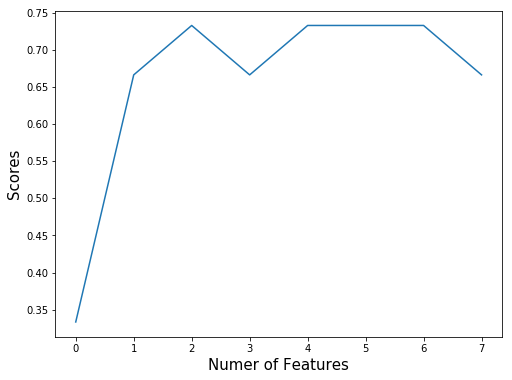

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(scores)
plt.xlabel('Numer of Features', size=15)
plt.ylabel('Scores', size=15)
plt.show();

In [41]:
feature_importances

array([['0.4142949321885567', 'Social support'],
       ['0.21236655751701508', 'Life expectancy'],
       ['0.19426150211454782', 'Pos'],
       ['0.07316573199725', 'GDP'],
       ['0.06856838306865988', 'Freedom'],
       ['0.021338796065126005', 'Neg'],
       ['0.016004097048844503', 'Generosity'],
       ['0.0', 'Corruption']], dtype='<U32')

With the above graph, we could use 2, 4, 5, or 6 features and still have the same score. 

Note that scores will vary as well as the number of features because training and validation set for models are chosen randomly and since our data is not big, random selection will affect the performance quite much.

Because we are short in the number of samples and data is not time-series data, there are not much we can do to explore. But still, we could try something like visualizing proportions of Social support (or other features) by different classes. 

Thank you for reading this and I will upload similar post about Happiness but with more data and features later.

If you find any errors or have any suggestion, please let me know!

[Check out other posts in different topics](https://tlr.gitbook.io/data-science/)